SCENARIO 1: 
Predict ocean water temperature using environmental and depth-related features.
Dataset (Kaggle – Public):
https://www.kaggle.com/datasets/sohier/calcofi


In [6]:
# Karthick 24BAD055

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


In [9]:
#load the dataset
df_ocean = pd.read_csv("bottle.csv", encoding="ISO-8859-1")
df_ocean.head()

C:\Users\karth\AppData\Local\Temp\ipykernel_8640\1706085288.py:2: DtypeWarning: Columns (0: IncTim, 1: DIC Quality Comment) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ocean = pd.read_csv("bottle.csv", encoding="ISO-8859-1")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#trying to merge
# Load bottle dataset
bottle = pd.read_csv("bottle.csv", encoding="ISO-8859-1")

# Load cast dataset (only required columns)
cast = pd.read_csv(
    "cast.csv",
    encoding="ISO-8859-1",
    usecols=["Cst_Cnt", "Sta_ID", "Lat_Dec", "Lon_Dec"]
)

# Merge datasets
df_ocean = pd.merge(
    bottle,
    cast,
    on=["Cst_Cnt", "Sta_ID"],
    how="left"
)

# Optional: rename for consistency
df_ocean.rename(
    columns={"Lat_Dec": "Latitude", "Lon_Dec": "Longitude"},
    inplace=True
)

df_ocean.head()

C:\Users\karth\AppData\Local\Temp\ipykernel_8640\683157625.py:3: DtypeWarning: Columns (0: IncTim, 1: DIC Quality Comment) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle = pd.read_csv("bottle.csv", encoding="ISO-8859-1")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment,Latitude,Longitude
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.833333,-124.083333
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.833333,-124.083333
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.833333,-124.083333
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.833333,-124.083333
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.833333,-124.083333


In [12]:
#Select features and target
features = ["Depthm", "Salnty", "O2ml_L", "Latitude", "Longitude"]
target = "T_degC"

df_ocean = df_ocean[features + [target]]
df_ocean.head()


,Depthm,Salnty,O2ml_L,Latitude,Longitude,T_degC
0,0,33.440,NaN,38.833333,-124.083333,10.50
1,8,33.440,NaN,38.833333,-124.083333,10.46
2,10,33.437,NaN,38.833333,-124.083333,10.46
3,19,33.420,NaN,38.833333,-124.083333,10.45
4,20,33.421,NaN,38.833333,-124.083333,10.45


In [13]:
#Handling missing values
df_ocean.fillna(df_ocean.mean(), inplace=True)


,Depthm,Salnty,O2ml_L,Latitude,Longitude,T_degC
0,0,33.4400,3.392468,38.833333,-124.083333,10.500
1,8,33.4400,3.392468,38.833333,-124.083333,10.460
2,10,33.4370,3.392468,38.833333,-124.083333,10.460
3,19,33.4200,3.392468,38.833333,-124.083333,10.450
4,20,33.4210,3.392468,38.833333,-124.083333,10.450
...,...,...,...,...,...,...
864858,0,33.4083,5.805000,32.953770,-117.279770,18.744
864859,2,33.4083,5.805000,32.953770,-117.279770,18.744
864860,5,33.4150,5.796000,32.953770,-117.279770,18.692
864861,10,33.4062,5.816000,32.953770,-117.279770,18.161


In [14]:
#Feature Scaling
X = df_ocean[features]
y = df_ocean[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
#Train_test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [16]:
#Train linear regression 
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [17]:
#Model evaulution
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 5.051309852975308
RMSE: 2.247511924990679
R2 Score: 0.7152431797109069


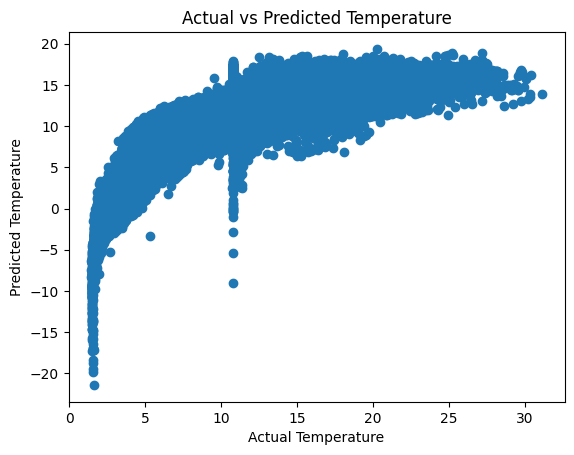

In [18]:
#Scatter plot Actual vs predicted 
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

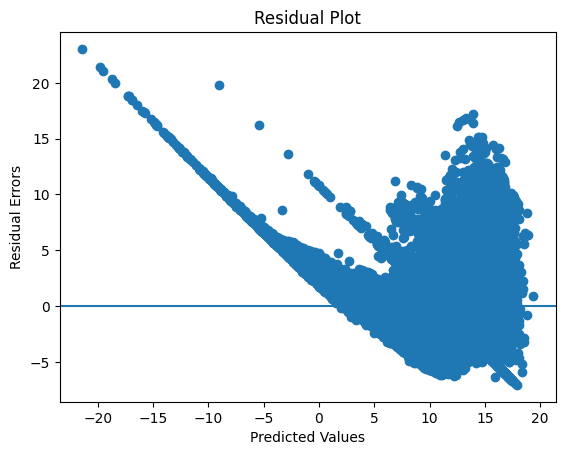

In [19]:
#Scatter plot Residual 
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residual Errors")
plt.title("Residual Plot")
plt.show()

In [20]:
#optimization Ridge and lasso residual 
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Ridge R2:", r2_score(y_test, ridge_pred))
print("Lasso R2:", r2_score(y_test, lasso_pred))

Ridge R2: 0.7152431791082685
Lasso R2: 0.7151993441579225
